In [1]:
"""
Created on Wed Jan 10 17:13:16 2024
@author: Wu Yuxuan
"""

import os
import warnings

import scFates as scf
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import numpy as np
from matplotlib import rc_context
from matplotlib import pyplot as plt
from ridgeplot import ridgeplot

import cellrank as cr
# import scanpy as sc
import scvelo as scv

from statannotations.Annotator import Annotator

In [2]:
sns.set_style('white')

In [3]:
seed = 1
warnings.simplefilter(action='ignore', category=FutureWarning)
# info
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(vector_friendly=True, dpi_save=1200) 
sc.logging.print_header()

scanpy==0.1.dev3254+g5b9bc72 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.3 pandas==1.5.2 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [4]:
os.chdir('/home/wu/datb1/reseq_ppp/Pub_PPP_code')

In [5]:
adata_ker = ad.read_h5ad('/home/wu/datb1/reseq_ppp/processed_data/KC_PPP_10X.h5ad')

In [6]:
adata_ker.obs['batch_group'] = adata_ker.obs.batch_group.cat.reorder_categories(['HC', 'NL', 'Lesion'])
adata_ker.uns['batch_group_colors'] = ['#3182bd', '#31a354', '#fd8d3c']

df_name = adata_ker.obs['batch'].astype(str).str.split("_", expand=True)
df_name.loc[df_name.index.str.contains('PPP'), 1] = df_name.loc[df_name.index.str.contains('PPP'), 1].str.split("C", expand=True)[0]
df_name = df_name[0] + '_' + df_name[1]
# df_name.str.split("C", expand=True)[0]
# df_name[df_name.index.str.contains('PPP_')] = df_name[df_name.index.str.contains('PPP')].str.split("C", expand=True)[0]
adata_ker.obs['patient'] = df_name.copy()
adata_ker.obs['patient'].value_counts()

HC_HC02     5708
PPPC_P38    5033
PPPC_P37    4132
PPPC_P39    3103
PPP_P18     2540
PPP_P36     1224
PPP_P24     1046
PPP_P40     1012
PPP_P37      944
PPP_P38      856
PPP_P39      401
HC_HC01      148
PPP_P17      139
PPP_P16       50
Name: patient, dtype: int64

### Marker genes list

In [7]:
df = pd.DataFrame()
df_list = []

sc.tl.rank_genes_groups(adata_ker, 'leiden', method='wilcoxon', use_raw=True, tie_correct=True)

for i in adata_ker.obs.leiden.cat.categories:
    df = sc.get.rank_genes_groups_df(adata_ker, group=i , key='rank_genes_groups').head(50)
    df['leiden'] = i
    df_list.append(df)

merged_df = pd.concat(df_list)
merged_df.to_csv('charts/KC_PPP_10X_leiden_marker.csv')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:28)


### KC Landscape

In [8]:
adata_ker.obs['leiden'] = adata_ker.obs['leiden'].cat.reorder_categories(['Basal KC I', 'Basal KC II', 'Basal KC III', 'Suprabasal KC I', 
                                            'Suprabasal KC II', 'Proliferating KC', 'Stressed KC'])

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


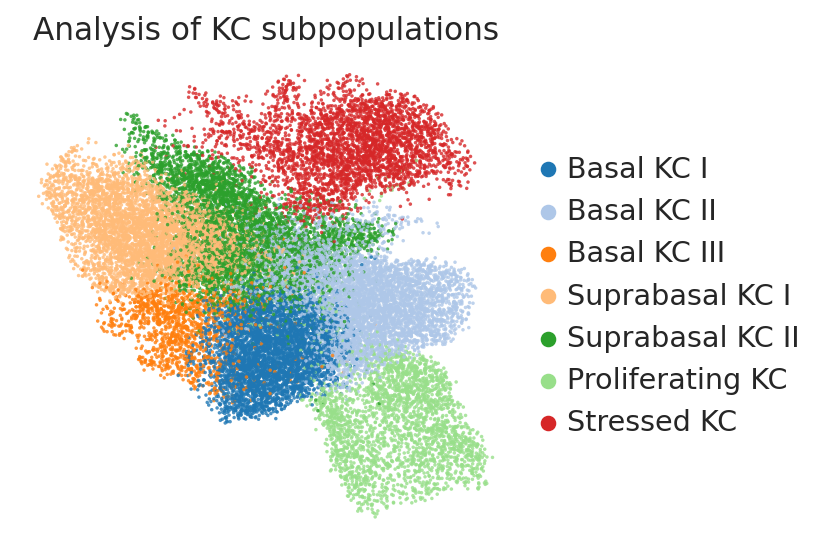

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(adata_ker, color=['leiden'], show=False, frameon=False, size=10, alpha=0.8)
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("Analysis of KC subpopulations")
    plt.savefig('figures/fig2/sc_kc_subpopulation.pdf', bbox_inches="tight")

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:376: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


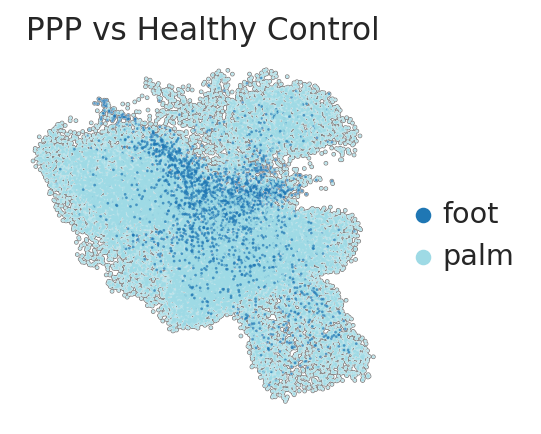

In [10]:
with rc_context({'figure.figsize': (3, 3)}):
    ax = sc.pl.umap(adata_ker, color=['batch_origin'], show=False, frameon=False, palette='tab20', size=6, alpha=0.7, add_outline=True, outline_color=('grey', 'white'))
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("PPP vs Healthy Control")
    plt.savefig('figures/fig2/sc_kc_batch_origin.pdf', bbox_inches="tight")
    plt.show()

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:376: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


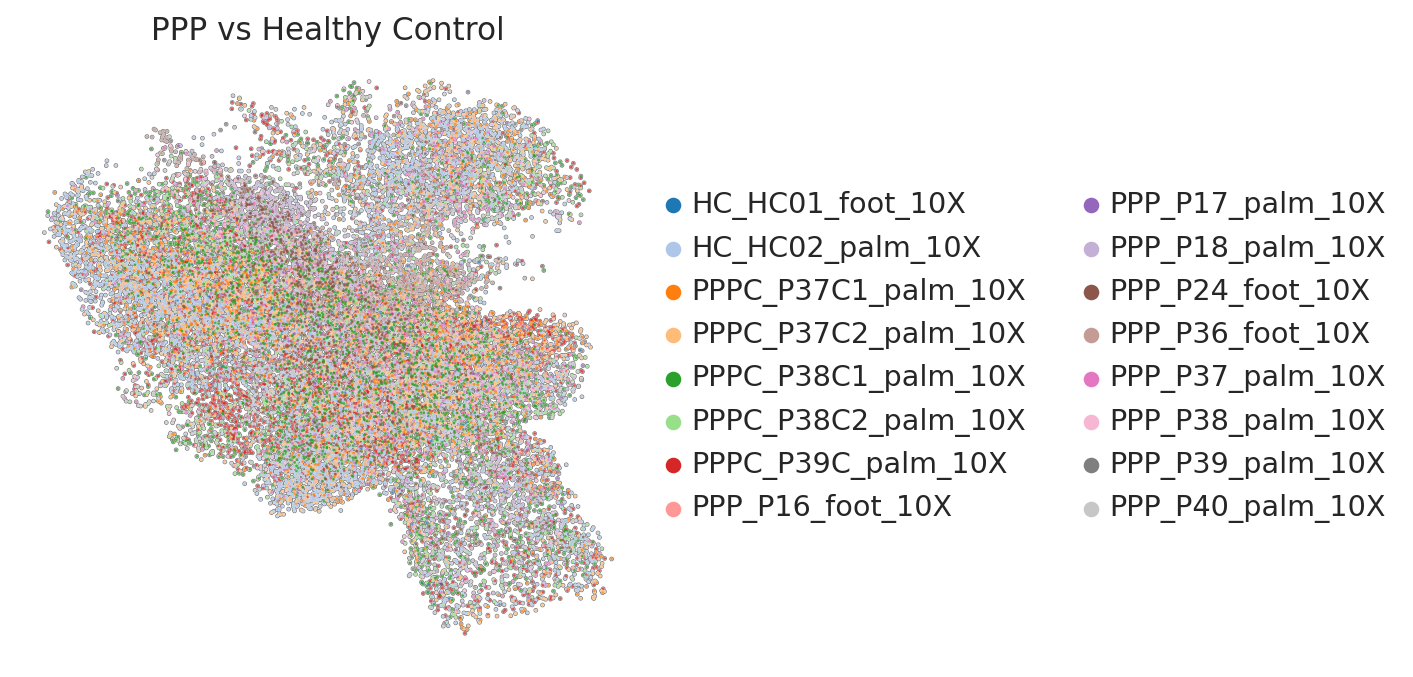

In [11]:
with rc_context({'figure.figsize': (5, 5)}):
    ax = sc.pl.umap(adata_ker, color=['batch'], show=False, frameon=False, size=6, alpha=0.8, add_outline=True, outline_color=('grey', 'white'))
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("PPP vs Healthy Control")

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:376: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


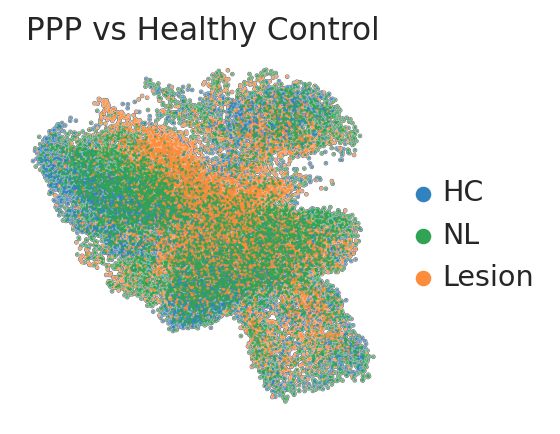

In [12]:
with rc_context({'figure.figsize': (3, 3)}):
    ax = sc.pl.umap(adata_ker, color=['batch_group'], show=False, frameon=False, size=6, alpha=0.8, add_outline=True, outline_color=('grey', 'white'))
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("PPP vs Healthy Control")
    plt.savefig('figures/fig2/sc_kc_batch_group.pdf', bbox_inches="tight")
    plt.show()

### Marker genes

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


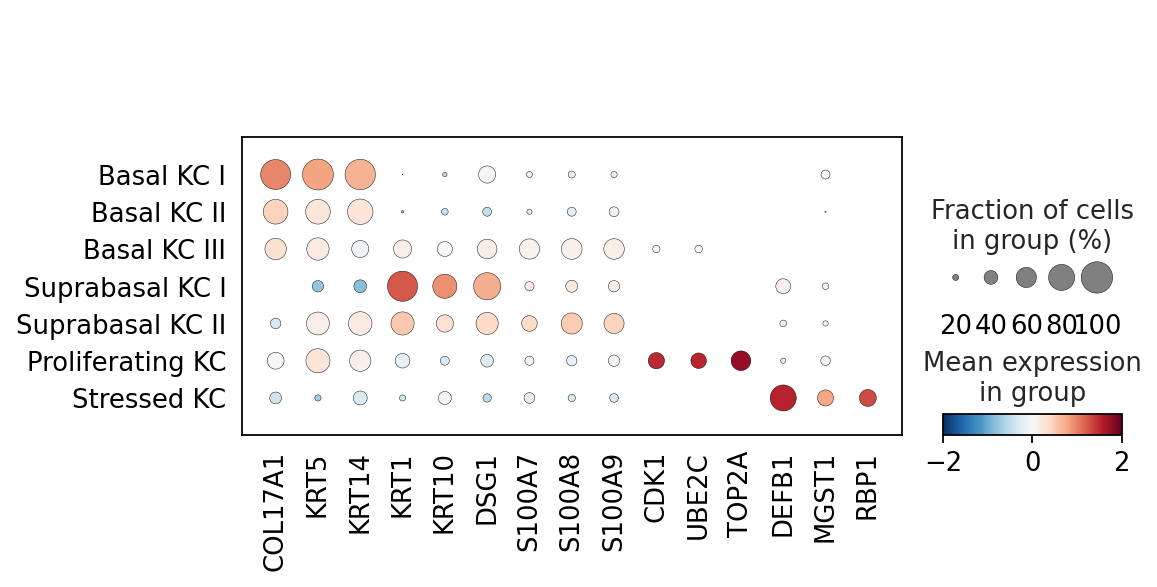

In [13]:
new_marker_genes = ['COL17A1', 'KRT5', 'KRT14', 'KRT1', 'KRT10', 'DSG1',
                    'S100A7', 'S100A8', 'S100A9', 'CDK1', 'UBE2C', 'TOP2A', 'DEFB1', 'MGST1', 'RBP1', 
                    ]

with rc_context({'figure.figsize': (8, 7)}):
    sc.pl.dotplot(adata_ker, new_marker_genes, groupby='leiden', show=False, use_raw=False, dot_max=1, dot_min=0.1, color_map='RdBu_r', vmax=2, vmin=-2)
    plt.savefig('figures/fig2/dot_kc_marker_genes.pdf', bbox_inches="tight")

### Stats

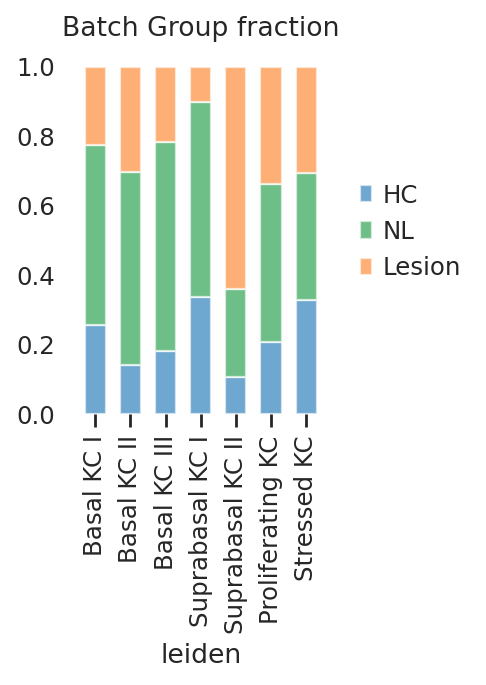

In [14]:
sns.set_theme(style='white')

df_plot = (adata_ker.obs.groupby(['batch_group', 'leiden']).size() / adata_ker.obs.groupby('leiden').size()).unstack().T
# df_plot = df_plot.reset_index()
# df_plot = df_plot[df_plot.batch.str.contains("palm")].set_index("batch")

# plot figure
with rc_context({'figure.figsize': (2, 3)}):
    ax = df_plot.plot.bar(stacked=True, color=adata_ker.uns['batch_group_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Batch Group fraction")
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.savefig('figures/fig2/bar_kc_batch_group.pdf', bbox_inches="tight")
    plt.show()

In [15]:
(adata_ker.obs.groupby(['batch_group', 'leiden']).size() / adata_ker.obs.groupby('batch_group').size()).unstack()

leiden       Basal KC I  Basal KC II  Basal KC III  Suprabasal KC I  \
batch_group                                                           
HC             0.194843     0.128415      0.041496         0.273395   
NL             0.186991     0.241034      0.066025         0.215765   
Lesion         0.122869     0.197516      0.035679         0.059425   

leiden       Suprabasal KC II  Proliferating KC  Stressed KC  
batch_group                                                   
HC                   0.082138          0.094775     0.184939  
NL                   0.092436          0.099853     0.097897  
Lesion               0.351437          0.110570     0.122504

In [26]:
adata_ker.uns_keys()

['batch',
 'batch_colors',
 'batch_group_colors',
 'batch_origin_colors',
 'batch_raw',
 'dendrogram_leiden',
 'hvg',
 'leiden',
 'leiden_colors',
 'log1p',
 'neighbors',
 'pca',
 'rank_genes_groups',
 'umap']

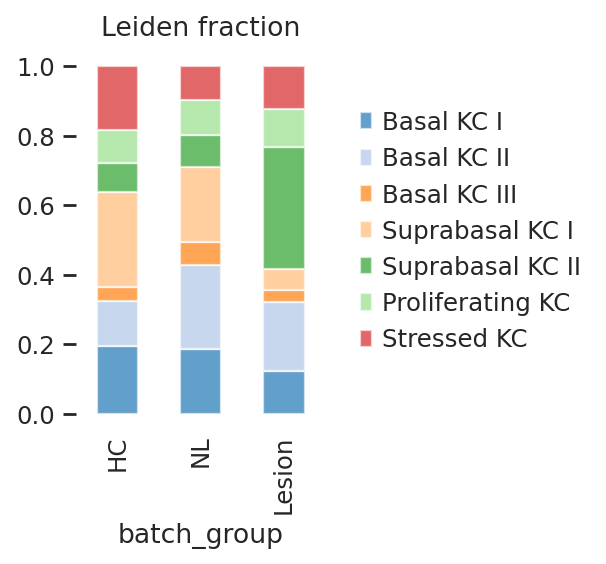

In [27]:
with rc_context({'figure.figsize': (2, 3)}):
    ax = (adata_ker.obs.groupby(['batch_group', 'leiden']).size() / adata_ker.obs.groupby('batch_group').size()).unstack() \
            .plot.bar(stacked=True, color=adata_ker.uns['leiden_colors'], width=0.5, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Leiden fraction")
    plt.tick_params(top=False,bottom=False,left=True,right=False)
    plt.savefig('figures/fig2/bar_0_kc_ppp_leiden_fraction.pdf', bbox_inches="tight")

In [17]:
# reverse leiden order to plot
adata_ker.obs['leiden'] = adata_ker.obs['leiden'].cat.reorder_categories(adata_ker.obs['leiden'].cat.categories[::-1])

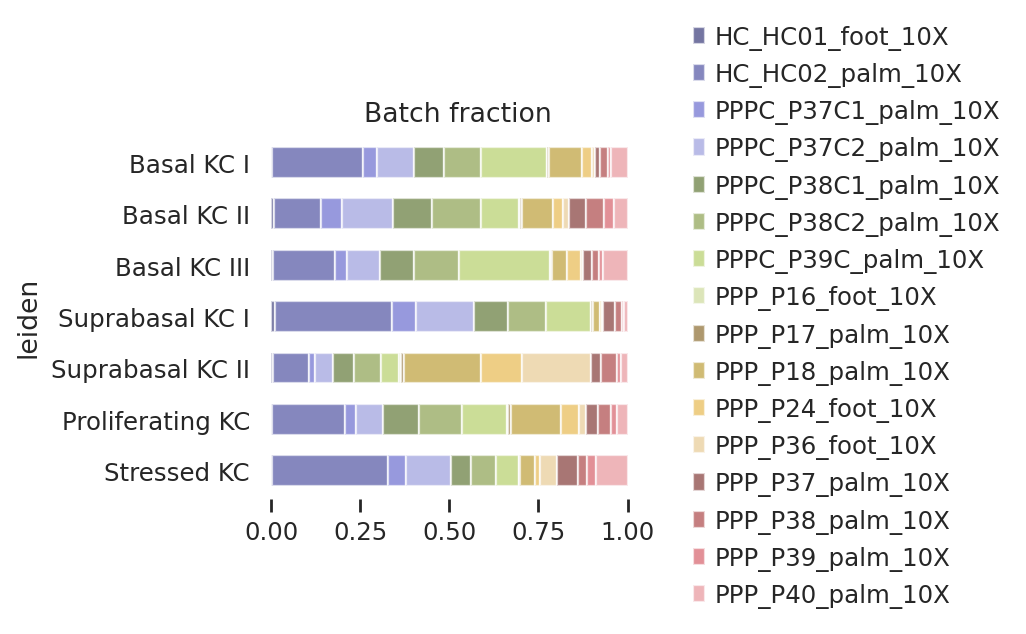

In [18]:
adata_ker.obs['batch'] = adata_ker.obs['batch'].astype('str')
# plot figure
with rc_context({'figure.figsize': (3, 3)}):
    ax = (adata_ker.obs.groupby(['leiden', 'batch']).size() / adata_ker.obs.groupby('leiden').size()).unstack() \
        .plot.barh(stacked=True, color=sns.color_palette("tab20b"), width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.title("Batch fraction")
    plt.savefig('figures/fig2/barh_1_kc_ppp_batch_fraction.pdf', bbox_inches="tight")
    plt.show()

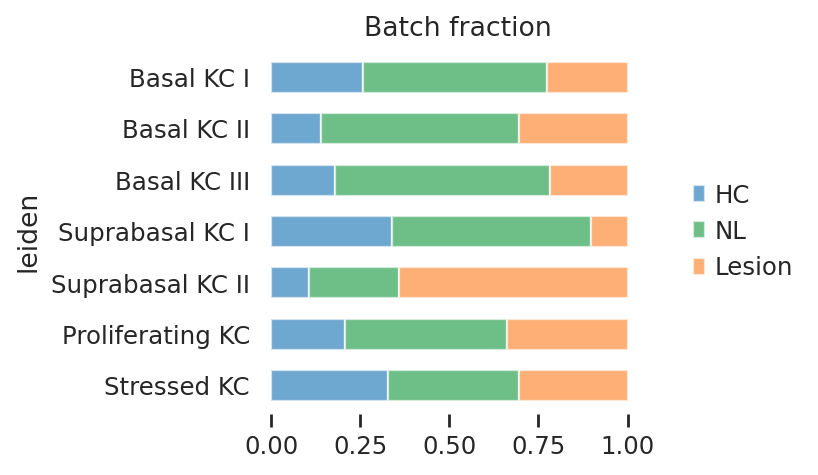

In [19]:
# plot figure
with rc_context({'figure.figsize': (3, 3)}):
    ax = (adata_ker.obs.groupby(['leiden', 'batch_group']).size() / adata_ker.obs.groupby('leiden').size()).unstack() \
        .plot.barh(stacked=True, color=adata_ker.uns['batch_group_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.title("Batch fraction")
    plt.savefig('figures/fig2/barh_1_kc_ppp_batch_group_fraction.pdf', bbox_inches="tight")
    plt.show()

In [20]:
# reverse back
adata_ker.obs['leiden'] = adata_ker.obs['leiden'].cat.reorder_categories(adata_ker.obs['leiden'].cat.categories[::-1])

### UMAP gene plots

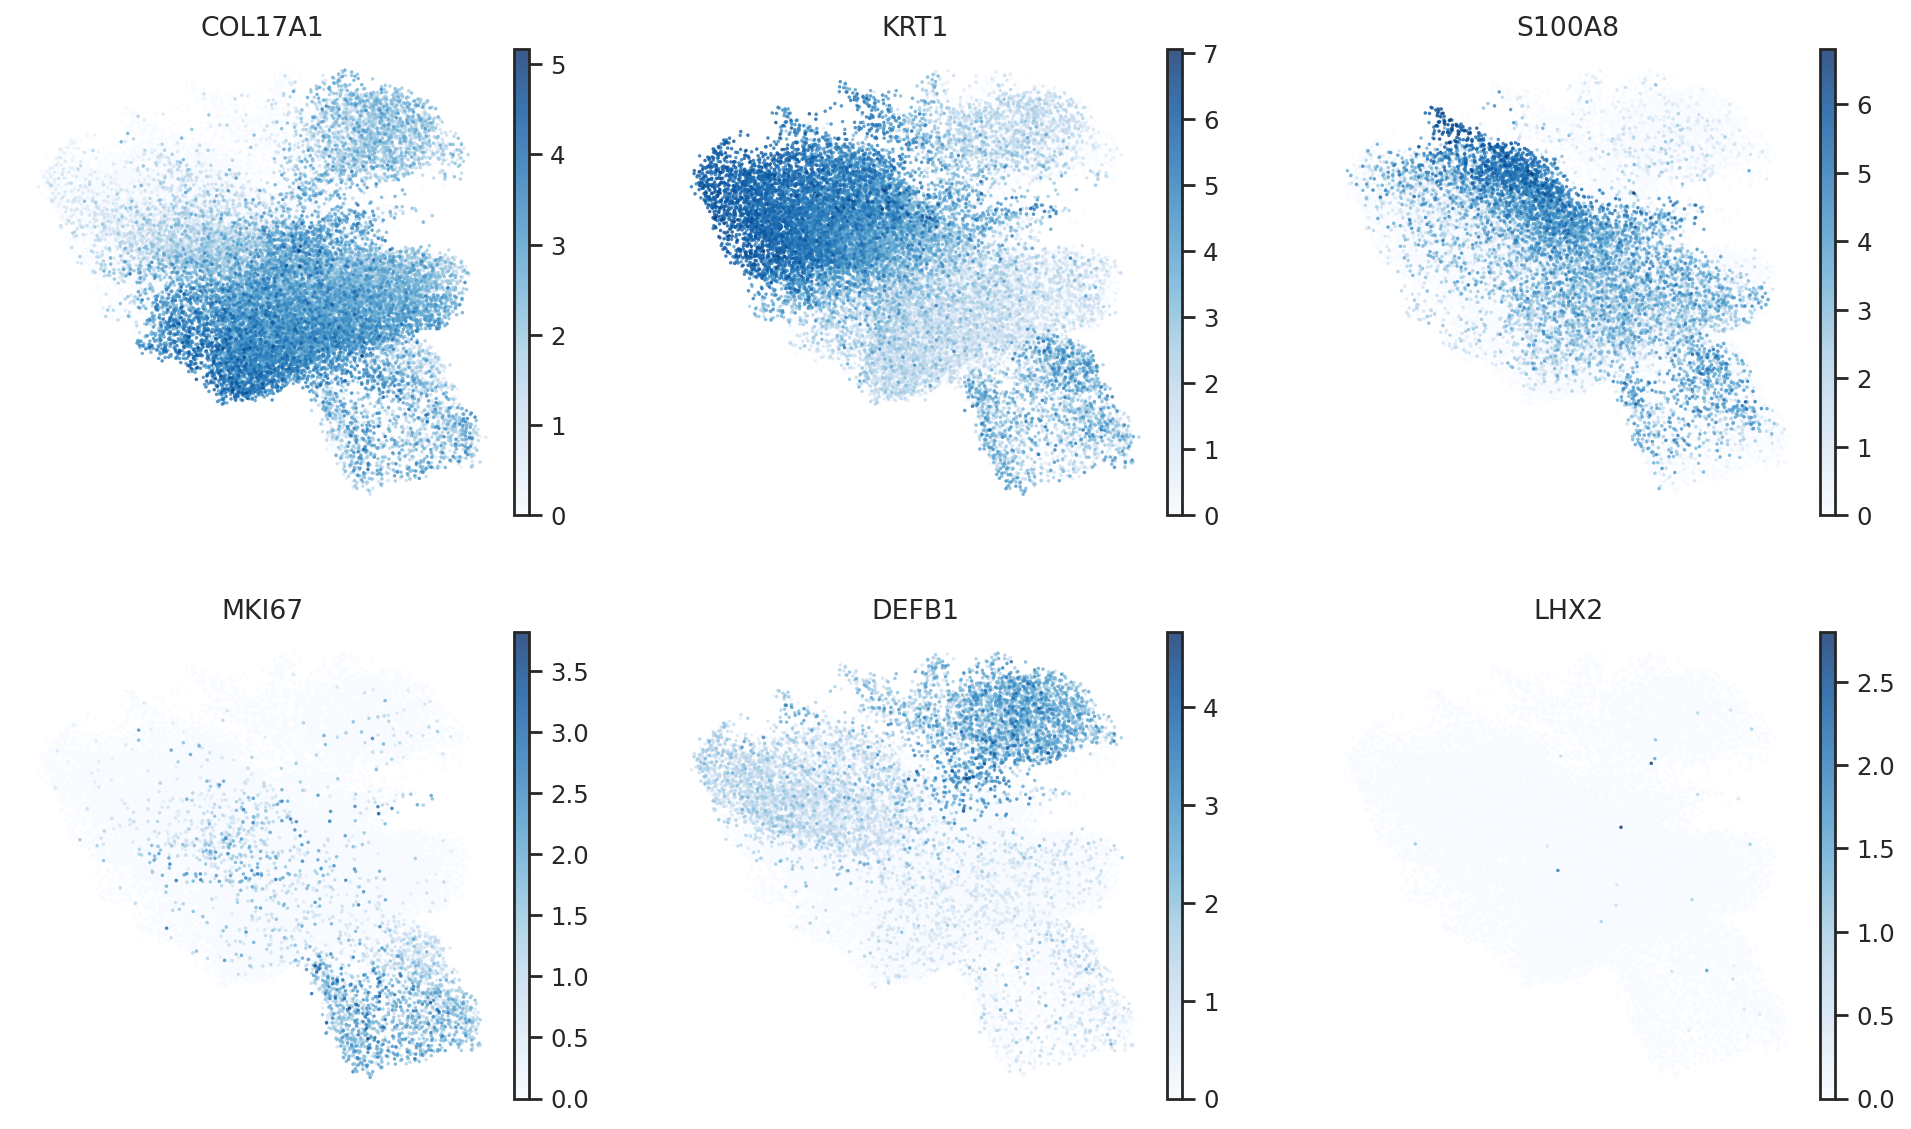

In [21]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(adata_ker, color=['COL17A1', 'KRT1', 'S100A8', 'MKI67', 'DEFB1', 'LHX2'], ncols=3, size=10, alpha=0.8, show=False, frameon=False, \
        cmap='Blues', vmin=0)

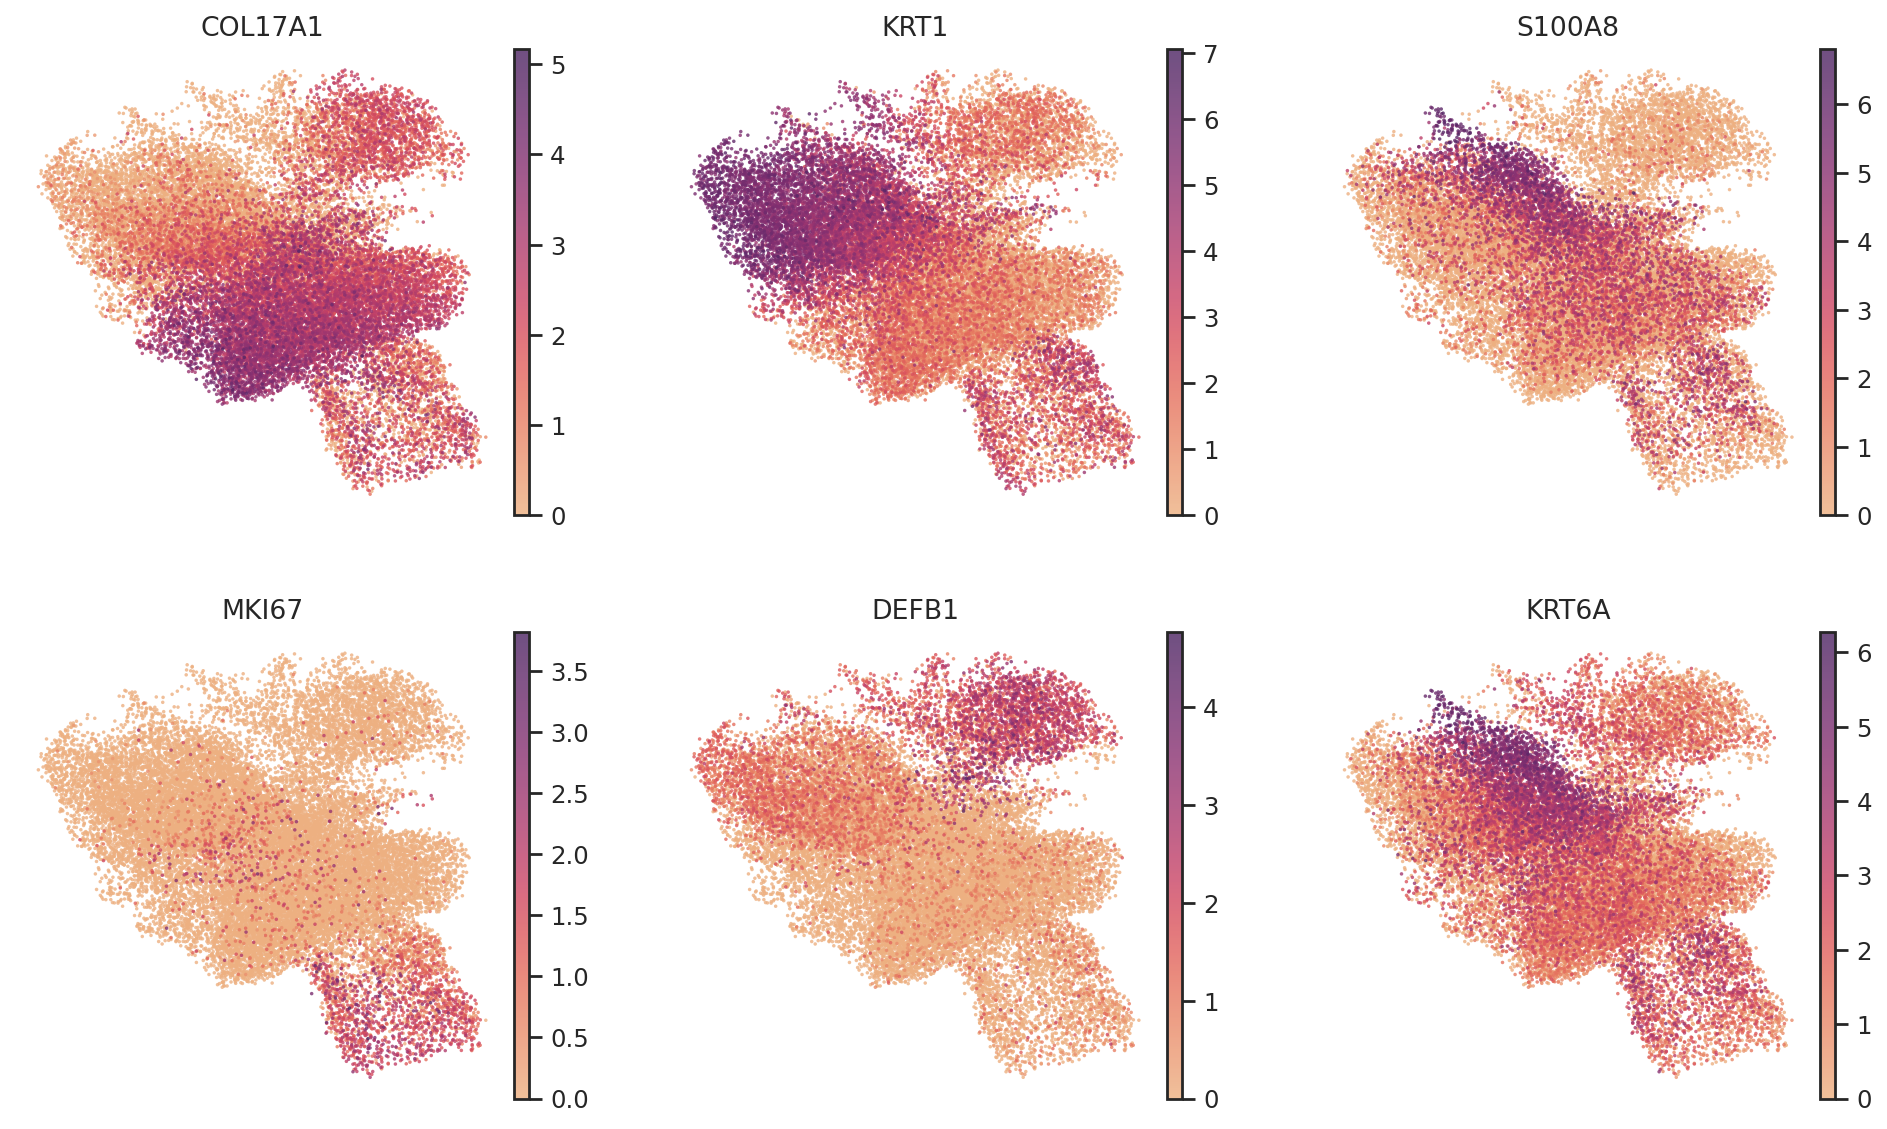

In [22]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(adata_ker, color=['COL17A1', 'KRT1', 'S100A8', 'MKI67', 'DEFB1', 'KRT6A'], ncols=3, size=10, alpha=0.8, show=False, frameon=False, \
        cmap='flare')
    plt.savefig('figures/fig2/sc_kc_marker_genes_umap.pdf', bbox_inches="tight")
    plt.show()

In [23]:
sc.tl.rank_genes_groups(adata_ker, 'leiden', method='wilcoxon', use_raw=True, tie_correct=True)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:20)


In [24]:
sc.tl.dendrogram(adata_ker, groupby='leiden', use_raw=True, key_added='dendrogram_leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


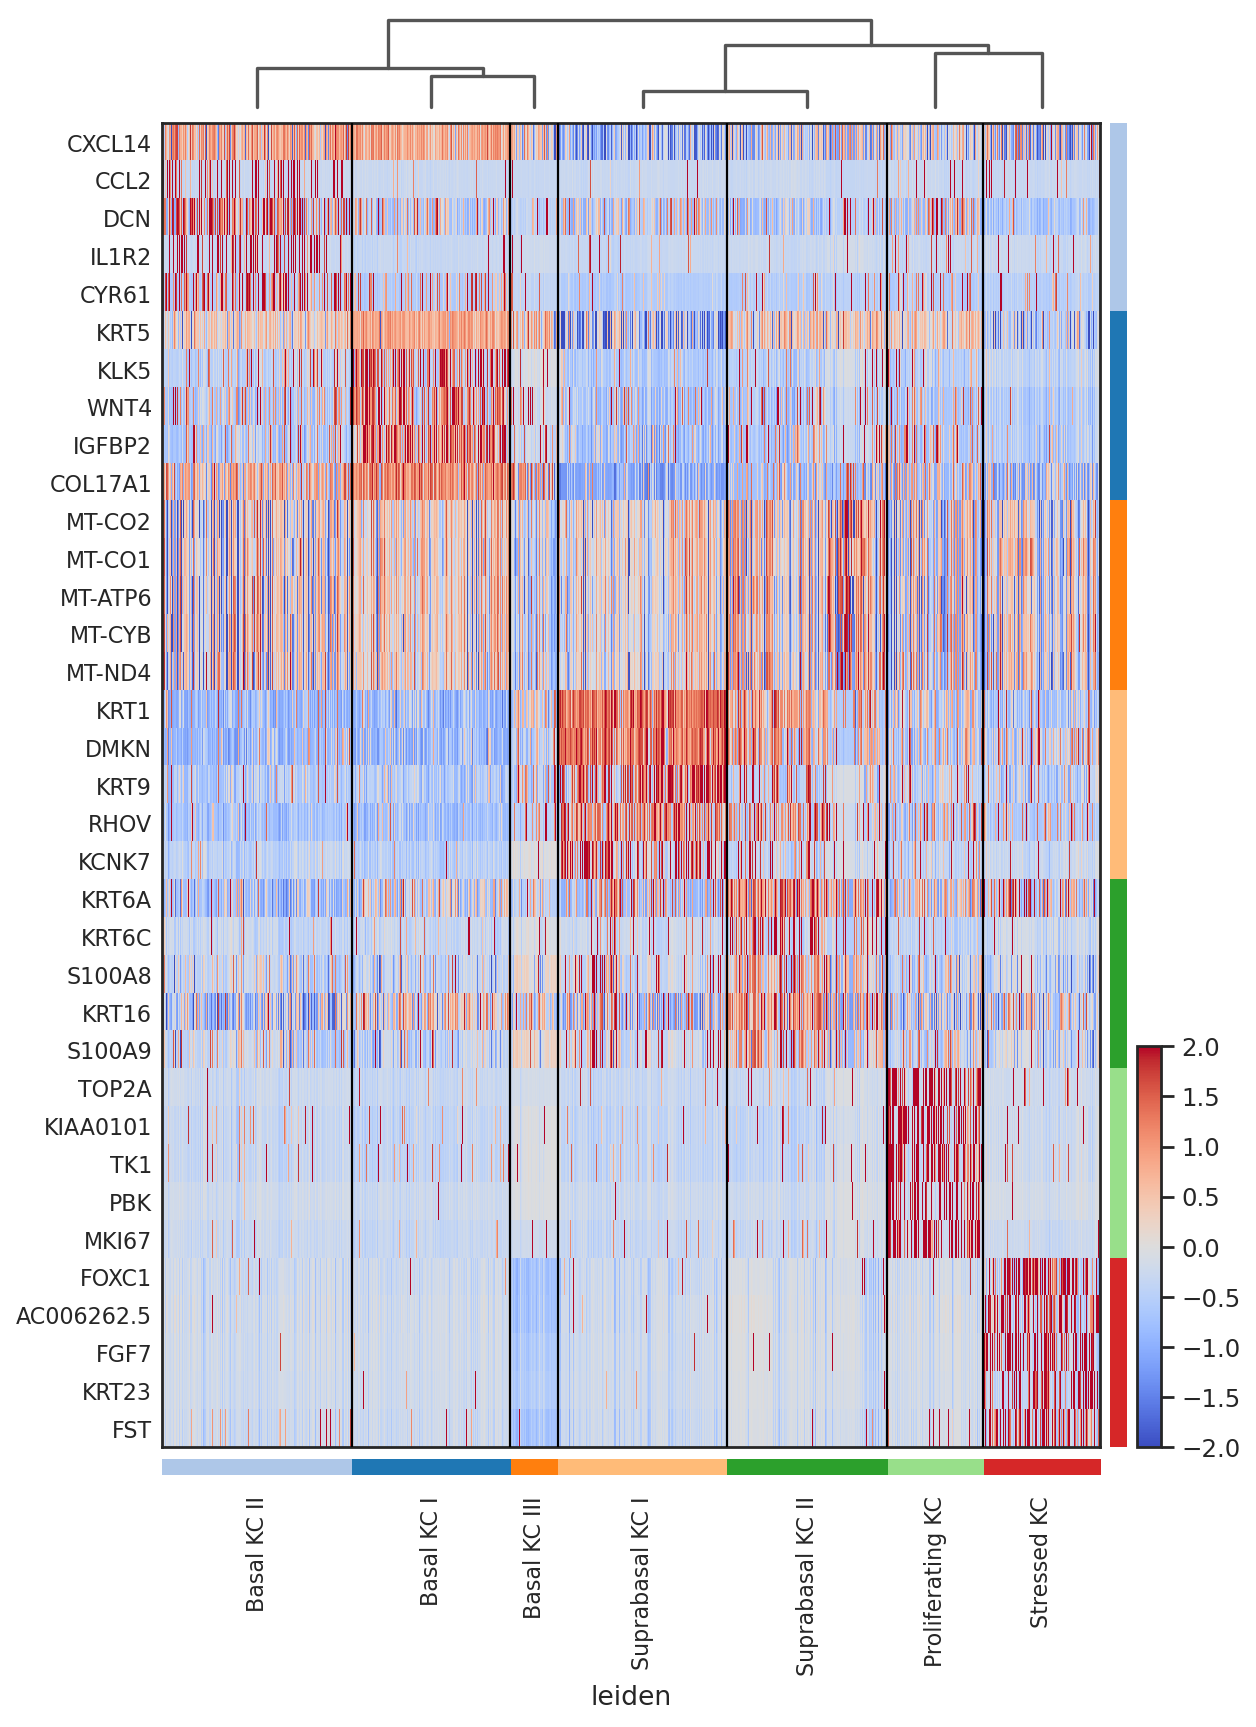

In [25]:
with rc_context({'figure.figsize': (3, 6)}):
    sc.pl.rank_genes_groups_heatmap(adata_ker, n_genes=5, swap_axes=True, show_gene_labels=True, use_raw=False,
                                vmin=-2, vmax=2, cmap='coolwarm', figsize=(8, 12), show=False)
    plt.savefig('figures/fig2/heatmap_kc_marker_genes.pdf', bbox_inches="tight")